# Replicability

In [6]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

In [7]:
ap_path = "output/analysis_results/var_mad_int_featselect/metrics/ap_nonrep.parquet"
map_path = "output/analysis_results/var_mad_int_featselect/metrics/map_nonrep.parquet"

map_scores = pd.read_parquet(map_path)

map_p_value_threshold = 0.05


reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(
    map_scores["p_value"], method="fdr_bh"
)


def correct_pvalues(group):
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(
        group["p_value"], method="fdr_bh"
    )
    group["p_value_corrected"] = pvals_corrected
    return group


map_scores["Metadata_Plate_dummy"] = map_scores["Metadata_Plate"]

map_scores = map_scores.groupby("Metadata_Plate_dummy").apply(
    correct_pvalues, include_groups=False
)

map_scores["below_p"] = map_scores["p_value"] < map_p_value_threshold
map_scores["below_corrected_p"] = (
    map_scores["corrected_p_value"] < map_p_value_threshold
)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

map_scores["neglog10_p_value_corrected"] = -np.log10(map_scores["p_value_corrected"])
map_scores["neglog10_p_value"] = -np.log10(map_scores["p_value"])
map_scores["cell_plate"] = (
    map_scores["Metadata_cell_type"] + ":" + map_scores["Metadata_Plate"].astype(str)
)

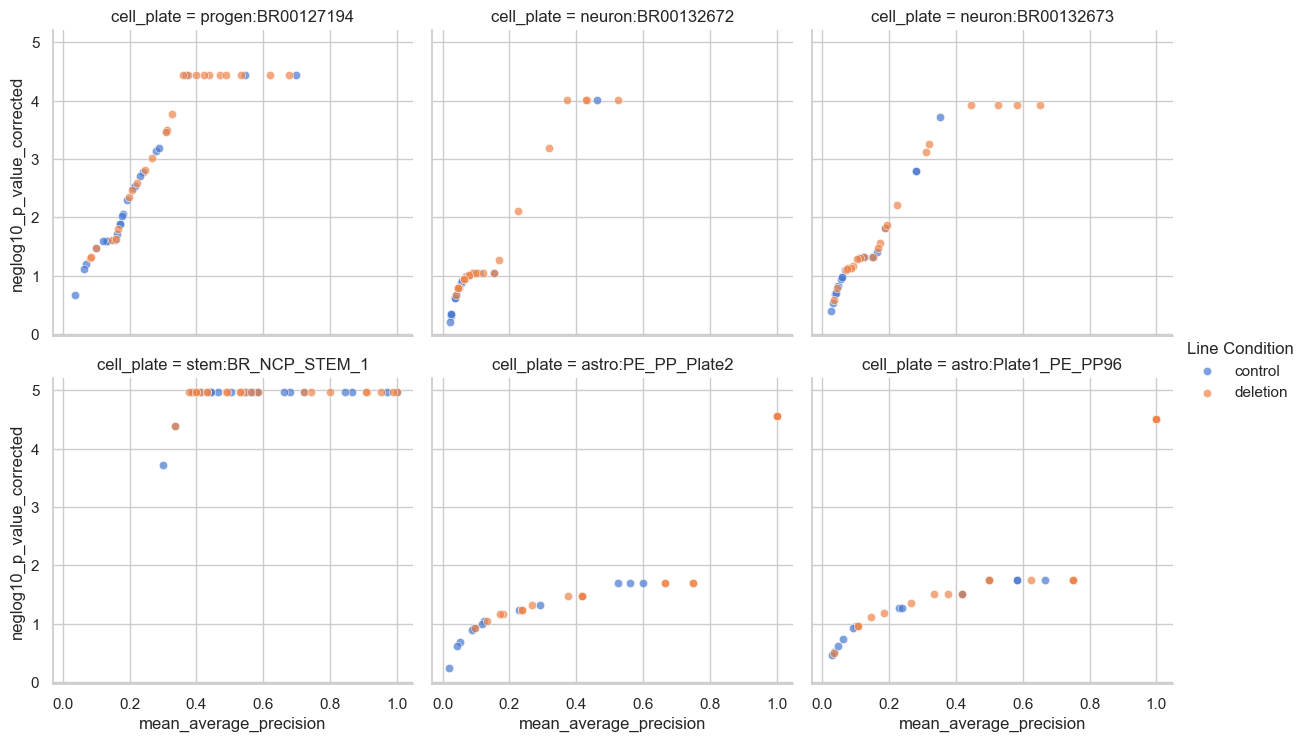

In [9]:
# Set up the plotting environment
sns.set_theme(style="whitegrid")


# Create a custom marker function to handle different markers for Metadata_line_source
def scatter_custom(x, y, **kwargs):
    markers = {"human": "o", "animal": "^"}
    marker = markers.get(kwargs["label"], "o")  # Default to "o" if not found
    sns.scatterplot(x=x, y=y, marker=marker, **kwargs)


# Create the scatter plot using custom function
g = sns.FacetGrid(
    map_scores,
    col="cell_plate",
    hue="Metadata_line_condition",
    palette="muted",
    col_wrap=3,
    height=4,
)

g.map(scatter_custom, "mean_average_precision", "neglog10_p_value_corrected", alpha=0.7)

# Add a legend and adjust the plot
g.add_legend(title="Line Condition")
g.figure.subplots_adjust(top=0.9)

# Show the plot
plt.show()

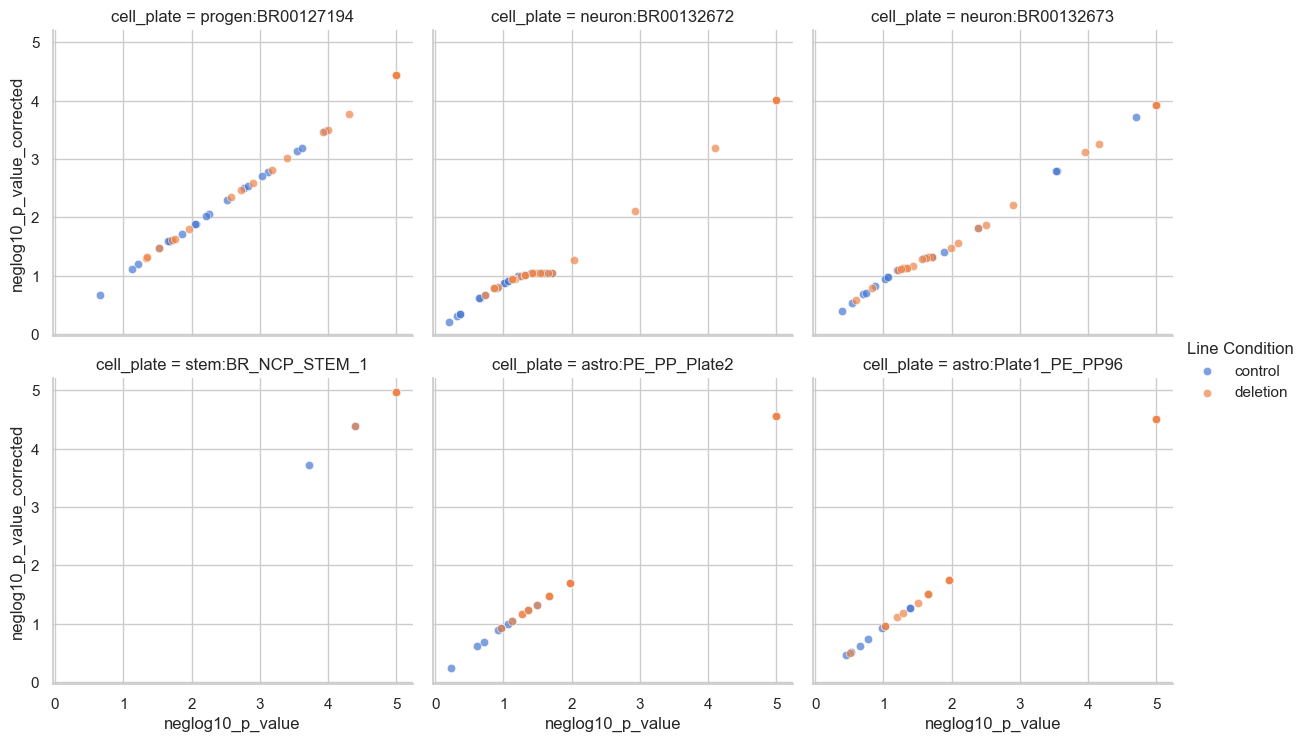

In [10]:
# Set up the plotting environment
sns.set_theme(style="whitegrid")


# Create a custom marker function to handle different markers for Metadata_line_source
def scatter_custom(x, y, **kwargs):
    markers = {"human": "o", "animal": "^"}
    marker = markers.get(kwargs["label"], "o")  # Default to "o" if not found
    sns.scatterplot(x=x, y=y, marker=marker, **kwargs)


# Create the scatter plot using custom function
g = sns.FacetGrid(
    map_scores,
    col="cell_plate",
    hue="Metadata_line_condition",
    palette="muted",
    col_wrap=3,
    height=4,
)

g.map(scatter_custom, "neglog10_p_value", "neglog10_p_value_corrected", alpha=0.7)

# Add a legend and adjust the plot
g.add_legend(title="Line Condition")
g.figure.subplots_adjust(top=0.9)

# Show the plot
plt.show()